# Tutorial: Erdumrundung mit unsicherem Passagiergewicht

In diesem Tutorial untersuchen wir das Szenario einer Erdumrundung ohne Auftanken mit unsicherem Passagiergewicht.  Für diese Aufgabe geeignete Flugzeuge sind leicht. Daher hat das Gewicht der Crew einen Einfluss auf die Reichweite.  Die *Formel von Breguet*

$$
R = C \ln \left(\frac{m_{\textrm{Flugzeug}} + m_{\textrm{Crew}} + m_{\textrm{Brennstoff}}}{m_{\textrm{Flugzeug}} + m_\textrm{Crew}} \right)
$$

berechnet die Reichweite $ R $ eines Propellerflugzeugs. Die Startmasse setzt sich aus dem Flugzeuggewicht, dem Gewicht der Crew und dem Brennstoffgewicht zusammen. Da der Brennstoff während des Fluges verbraucht wird, trägt er nicht zur Endmasse bei. Das Gewicht des Flugzeugs mit allem Equipment beträgt $m_{\textrm{Flugzeug}} = 900\,$ kg. Für das betrachtete Flugzeug gilt $C= 10^4\,$ km. Neben der Pilotin wird noch ein weiterer Passagier an dem Flug teilnehmen. Da der Flug in einem Preisausschreiben verschenkt wird, ist dessen Identität aktuell unbekannt. Die einzige Vorgabe an den Passagier ist, dass dieser kein Gepäck mitnehmen darf. <br>

## Gesamtaufgabe:
Sie als Ingenieur_in sollen die benötigte Treibstoffmenge ermitteln. Da das Gewicht der Crew unbekannt ist, kann kein exakter Wert bestimmt werden. Stattdessen soll eine *Unsicherheitsquantifizierung* erfolgen. Zur Verfügung steht Ihnen die *Formel von Breguet*, außerdem beherrschen Sie die *Monte Carlo Methode*.

### 1. Modellierung der Unsicherheit im Gewicht der Crew

Das Gewicht der Pilotin ist bekannt und beträgt $71\,$ kg. Die unbekannten Größen sind das Gewicht des zusätzlichen Passagiers und seines Handgepäcks. <br>
Modellieren Sie die unbekannte Masse der Crew als Zufallsvariable. <br>

* #### Gegeben 
$m_{\textrm{Pilotin}} = 71\,$ kg

* #### Lösung 
Als Grundlage sollte die Verteilung des Körpergewichts der Bevölkerung herangezogen werden. Die entsprechenden Daten können durch eine Internetrecherche ermittelt werden (z.B. statista.com). Das Körpergewicht kann zur Vereinfachung als normalverteilt angenommen werden. Der Mittelwert ergibt sich dann zu 
$$\mu_\text{Crew} = 71 \, \text{kg} + \mu_{\textrm{Passagier}}.$$
Die Standardabweichung berechnet sich zu
$$\sigma_\text{Crew} = \sigma_{\textrm{Passagier}}.$$
In diesem Fall wurde der Mittelwert $\mu_{\textrm{Passagier}}$ und die Standardabweichung $ \sigma_{\textrm{Passagier}}$ so gewählt, dass die zugehörige Normalverteilung das Histogramm von https://de.statista.com/statistik/daten/studie/278037/umfrage/koerpergewicht-in-deutschland/ möglichst gut annähert. 
Die darauf folgende Abbildung zeigt dann eine grobe Näherung des normalverteilten Gesamtgewichts der Crew.

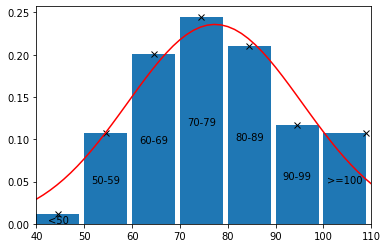

Mittelwert (Passagiergewicht): 77.30
Standardabweichung (Passagiergewicht): 18.25


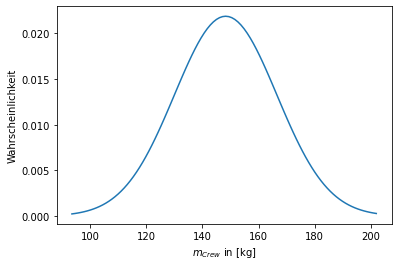

In [2]:
# Import der notwendigen Module 
%run import_modules.ipynb

m_Pilotin = 71 # Gewicht der Pilotin
mu_Passagier,sigma_Passagier = fit_weight_distribution()
print("Mittelwert (Passagiergewicht): %2.2f" %mu_Passagier)
print("Standardabweichung (Passagiergewicht): %2.2f" %sigma_Passagier)

mu = m_Pilotin + mu_Passagier # Mittelwert des Gesamtgewichts der Crew
sigma = sigma_Passagier # Standardabweichung des Gesamtgewichts der Crew

# Plotten der Verteilung des Gesamtgewichts der Crew
plot_crew_distribution(mu, sigma)

### 2. Monte Carlo Simulation
Für eine Erdumrundung müssen Sie eine Strecke von ungefähr $s = 25000\,$ km zurücklegen können. Bei bisherigen Flügen dieser Art hat sich eine Brennstoffmasse von $\hat{m}_{\textrm{Brennstoff}} = 12000\,$ kg bewährt. Sie wollen nun mithilfe einer *Monte Carlo Simulation* ausrechnen, mit welcher Wahrscheinlichkeit der Erfahrungswert $\hat{m}_{\textrm{Brennstoff}}$ ausreicht. Im Rahmen der *Monte Carlo Simulation* werden verschiedene Gewichte von möglichen Passagieren anhand der im ersten Aufgabenteil modellierten Verteilung simuliert. Für jedes simulierte Gewicht wird die Reichweite berechnet. Ist sie größer als $s = 25000\,$ km, ist der Brennstoff ausreichend. In diesem Fall ist einen Erfolg zu verbuchen, ansonsten einen Misserfolg. Die Wahrscheinlichkeit ergibt sich dann näherungsweise aus der relativen Häufigkeit eines Erfolges. Die nachfolgende Zelle visualisiert das Vorgehen.

* #### Gegeben
$C= 10^4\,$ km, $s = 25000\,$ km, $m_{\textrm{Flugzeug}} = 900\,$ kg, $\hat{m}_{\textrm{Brennstoff}} = 12000\,$ kg, Modellierung von $ m_{\textrm{Crew}} $ aus Teilaufgabe 1

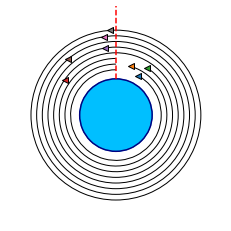

5 Erfolge und 3 Misserfolge
Relative Häufigkeit eines Erfolges: 0.625


In [6]:
# Visualisierung des MC Verfahrens
visualization_MC_airplanes()

* #### Lösung

In [11]:
def MC_airplanes(m_Brennstoff):    
    # Zu Beginn ist die absolute Häufigkeit eines Erfolgs gleich Null
    H_Erfolg = 0    # die Variable H_Erfolg speichert die Häufigkeit eines Erfolgs
    # m_Brennstoff = 12100    # Gewicht des Brennstoffs
    m_Flugzeug = 900

    # Wir simulieren N Flüge mit unterschiedlichen Gewichten der Crew
    N = 100000
    for i in range(0,N):    # Starte die for-Schleife
        m_Crew = gauss(mu=mu, sigma=sigma)
        # Erzeuge zufällig das Gewicht der Crew
        R = 10000*log((m_Flugzeug + m_Brennstoff + m_Crew)/(m_Flugzeug + m_Crew))   # Berechne Reichweite
        if R > 25000:   # können wir die Erde umrunden? 
            H_Erfolg += 1          # notiere den Erfolg

    # Wir müssen noch durch die Anzahl an Simulationen teilen, um die relative Häufigkeit zu erhalten
    h_Erfolg = H_Erfolg/N
    
    print_results(N, H_Erfolg, h_Erfolg)

# Interaktiver Slider
interact(MC_airplanes, m_Brennstoff=IntSlider(min=11400, max=12400, step=50, value=12000));

91322 Erfolge und 8678 Misserfolge
Relative Häufigkeit eines Erfolges: 0.91322


### 3. Modifizierung der Brennstoffmasse
Ändern Sie die Treibstoffmasse, bis Sie die Erde in mindestens $ 99,9 $ Prozent der Fälle umrunden können.

* #### Lösung
Der systematische Weg wäre eine Optimierung von $ m_\textrm{Brennstoff} $. Es ist jedoch ausreichend, die Brennstoffmasse manuell auf $12050\,$kg zu erhöhen.